In [3]:
import helper_data_load as helper_load
import os
import helper_prediction_class as helper
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, kruskal
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import pearsonr

In [50]:
data_norm_chum, data_norm_iucpq = helper_load.get_norm_data(local=True, classification=True)


223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

149 patients with clinical and radiation data for CHUM and classification.
108 patients with clinical and radiation data for IUCPQ and classification.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.class_os_days == "nan"] = np.nan


In [52]:
data_norm_iucpq

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet_LLL_gldm_GrayLevelVariance,wavelet_LLL_gldm_HighGrayLevelEmphasis,wavelet_LLL_gldm_LargeDependenceEmphasis,wavelet_LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet_LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet_LLL_gldm_LowGrayLevelEmphasis,wavelet_LLL_gldm_SmallDependenceEmphasis,wavelet_LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet_LLL_gldm_SmallDependenceLowGrayLevelEmphasis,class_os_days
0,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
4,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-1.831888,-1.054257,-0.95815,-0.776524,-0.80211,-0.799463,-0.804681,-0.791615,-0.487101,-0.942236,...,-0.214216,-0.916589,-0.498812,-0.743786,-0.237576,-0.117829,1.103219,-0.510397,-0.105429,2
104,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
105,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
106,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [4]:
data_norm_chum, data_norm_iucpq = helper_load.get_norm_data(local=True, classification=False)


223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')


In [9]:
corr_chum = pd.DataFrame(data_norm_chum.corr("pearson")["os_days"])

In [20]:
rad_feats = list(data_norm_iucpq.columns)
rad_feats.remove("os_days")

In [31]:
col_names = ["feat", "corr", "p_val"]
stats_df = pd.DataFrame(columns=col_names)
for feat in rad_feats:
    corr, p = pearsonr(data_norm_iucpq[feat], data_norm_iucpq["os_days"])
    temp_list = [feat, corr, p]
    new_row = pd.DataFrame(dict(zip(col_names, temp_list)), index= [0])
    stats_df = pd.concat([stats_df, new_row])

In [46]:
p_val_arr = np.array(stats_df["p_val"])
reject, p_val_corrected = fdrcorrection(pvals=p_val_arr)
stats_df["FDR_corr"] = p_val_corrected
stats_df["-log10(FDR)"] = -np.log10(p_val_corrected)

<AxesSubplot: xlabel='corr', ylabel='-log10(FDR)'>

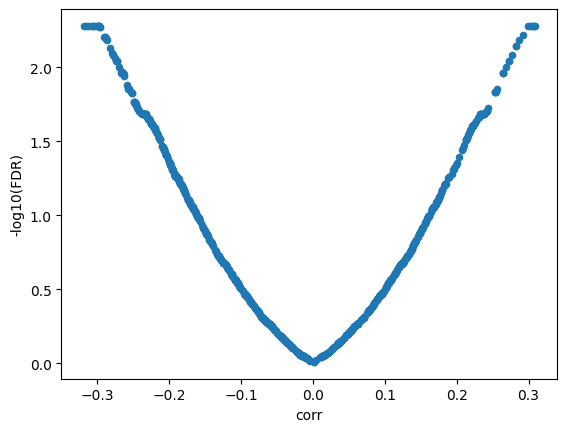

In [49]:
stats_df.plot.scatter(x="corr", y="-log10(FDR)")

,feat,corr,p_val,FDR_corr
0,original_shape_Elongation,-0.181332,0.020928,0.065236
0,original_shape_Flatness,-0.228129,0.003503,0.022416
0,original_shape_LeastAxisLength,-0.234673,0.002648,0.020547
0,original_shape_MajorAxisLength,-0.206982,0.008224,0.035951
0,original_shape_Maximum2DDiameterColumn,-0.229182,0.003351,0.022375
...,...,...,...,...
0,wavelet_LLL_gldm_LargeDependenceLowGrayLevelEm...,0.001996,0.979893,0.981046
0,wavelet_LLL_gldm_LowGrayLevelEmphasis,0.113731,0.149575,0.249585
0,wavelet_LLL_gldm_SmallDependenceEmphasis,0.222073,0.004509,0.024851
0,wavelet_LLL_gldm_SmallDependenceHighGrayLevelE...,0.014410,0.855582,0.891187
